In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.simplefilter('ignore')

In [2]:
from nsepy import get_history

# 1. Price vs Volume analysis

In [3]:
end = dt.datetime.today()
start = dt.datetime(2020,1,31)
expiry_I = dt.datetime(2020,4,30)
expiry_II = dt.datetime(2020,3,26)
expiry_III = dt.datetime(2020,2,27)
expiryI = dt.datetime(2020,5,28)
expiryII = dt.datetime(2020,6,25)
expiryIII = dt.datetime(2020,7,30)

In [4]:
while True:
    try:
        niftyI = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiryI)
        niftyII = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiryII)
        niftyIII = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiryIII)
        nifty_I = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiry_I)
        nifty_II = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiry_II)
        nifty_III = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True, futures = True, expiry_date = expiry_III)
        nifty = get_history(symbol = 'NIFTY', start =  start ,end = end ,index = True)   
    except Exception as er:
        print(er)
        continue
    else:
        niftyI.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        niftyII.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        niftyIII.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        nifty_I.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        nifty_II.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        nifty_III.drop(['Symbol','Expiry','Last','Settle Price','Turnover','Open','High','Low'],axis =1,inplace = True)
        nifty.drop(['Open','High','Low','Volume','Turnover'],axis = 1, inplace = True)
        break

In [5]:
niftyI['VolumeI'] = niftyI['Number of Contracts']*75
niftyII['VolumeII'] = niftyII['Number of Contracts']*75
niftyIII['VolumeIII'] = niftyIII['Number of Contracts']*75
nifty_I['Volume_I'] = nifty_I['Number of Contracts']*75
nifty_II['Volume_II'] = nifty_II['Number of Contracts']*75
nifty_III['Volume_III'] = nifty_III['Number of Contracts']*75

In [6]:
data_vol = pd.concat([nifty_III['Volume_III'].to_frame(),nifty_II['Volume_II'].to_frame(),nifty_I['Volume_I'].to_frame(),niftyI['VolumeI'].to_frame(),niftyII['VolumeII'].to_frame(),niftyIII['VolumeIII'].to_frame()],axis = 1)

In [7]:
data_vol.fillna(0,inplace = True)

In [8]:
data_vol['Volume'] = np.nan

In [9]:
for i in range(data_vol.shape[0]):
    data_vol['Volume'].iloc[i] = data_vol.iloc[i,:].sum()

In [10]:
data_vol

,Volume_III,Volume_II,Volume_I,VolumeI,VolumeII,VolumeIII,Volume
2020-01-31,14182650.0,264900.0,25800.0,0.0,0.0,0.0,14473350.0
2020-02-01,22963350.0,659250.0,158400.0,0.0,0.0,0.0,23781000.0
2020-02-03,13749975.0,340725.0,62400.0,0.0,0.0,0.0,14153100.0
2020-02-04,15152250.0,450075.0,66750.0,0.0,0.0,0.0,15669075.0
2020-02-05,10580850.0,396225.0,127500.0,0.0,0.0,0.0,11104575.0
...,...,...,...,...,...,...,...
2020-05-11,0.0,0.0,0.0,16216800.0,557175.0,74700.0,16848675.0
2020-05-12,0.0,0.0,0.0,19316250.0,596250.0,88875.0,20001375.0
2020-05-13,0.0,0.0,0.0,19148250.0,688050.0,98100.0,19934400.0
2020-05-14,0.0,0.0,0.0,17587575.0,676725.0,66675.0,18330975.0


In [11]:
data_vol.drop(['Volume_III','Volume_II','Volume_I','VolumeI','VolumeII','VolumeIII'],axis =1,inplace = True)

In [12]:
PV_analysis = pd.concat([data_vol,nifty],axis = 1)

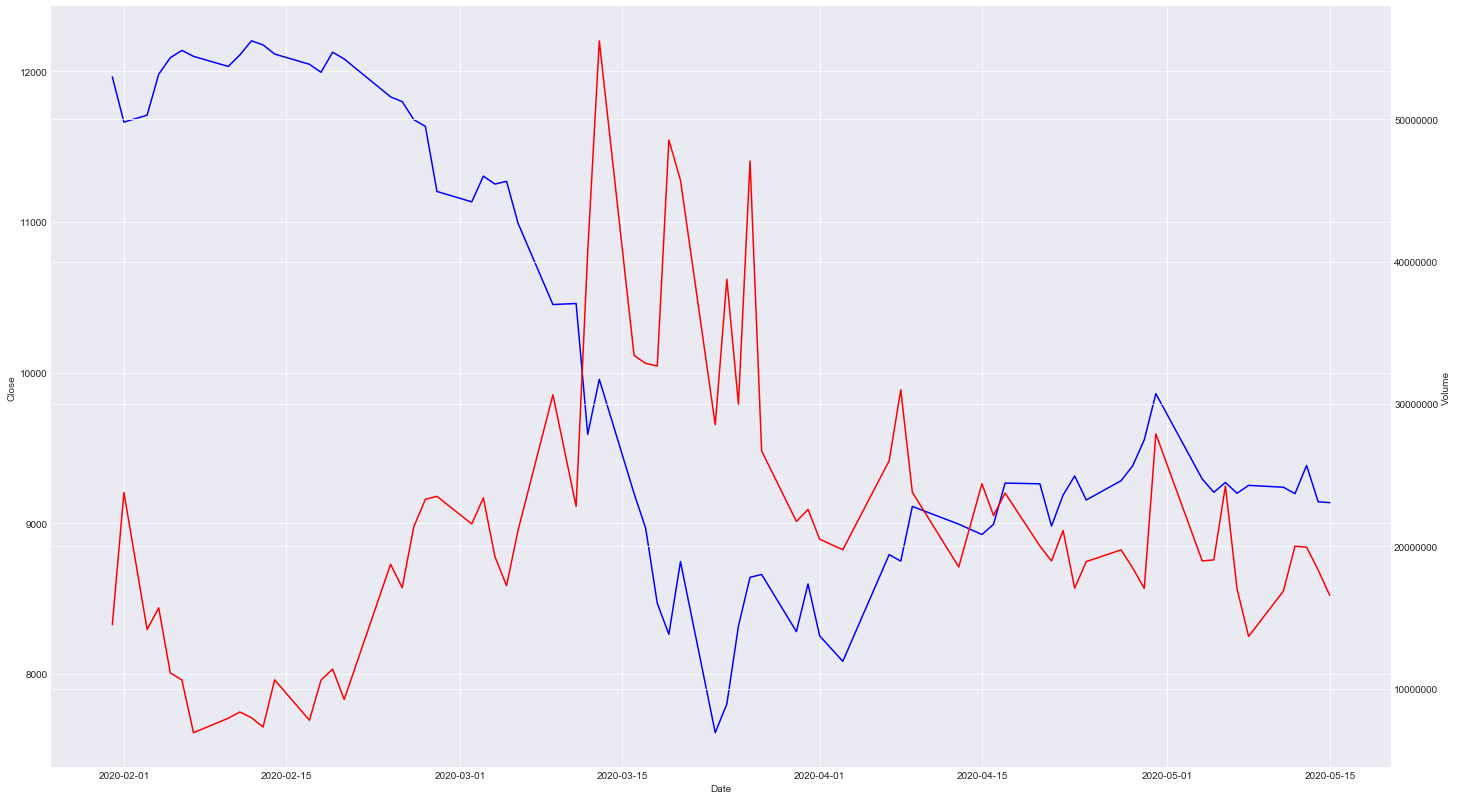

In [13]:
plt.rcParams["figure.figsize"]=24,14
fig, ax1 = plt.subplots()
plt.xlabel('Date')
plt.ylabel('Close')
ax1.plot(PV_analysis['Close'],'b')
ax2 = ax1.twinx()
plt.ylabel('Volume')
plt.ticklabel_format(axis = 'y' , style='plain')
ax2.plot(PV_analysis['Volume'],'r')
plt.show()

# 2. Price vs OI analysis

In [14]:
data_OI = pd.concat([nifty_III['Open Interest'].to_frame(),nifty_II['Open Interest'].to_frame(),nifty_I['Open Interest'].to_frame(),niftyI['Open Interest'].to_frame(),niftyII['Open Interest'].to_frame(),niftyIII['Open Interest'].to_frame()],axis = 1)

In [15]:
data_OI['OI'] = np.nan

In [16]:
data_OI.fillna(0,inplace = True)

In [17]:
data_OI = data_OI.astype(int)

In [18]:
for i in range(data_OI.shape[0]):
    data_OI.iloc[i,6] = data_OI.iloc[i,:].sum()

In [19]:
data_OI.drop(['Open Interest','Open Interest','Open Interest','Open Interest','Open Interest','Open Interest'],axis = 1, inplace = True)

In [20]:
POI_analysis = pd.concat([data_OI,nifty],axis = 1)

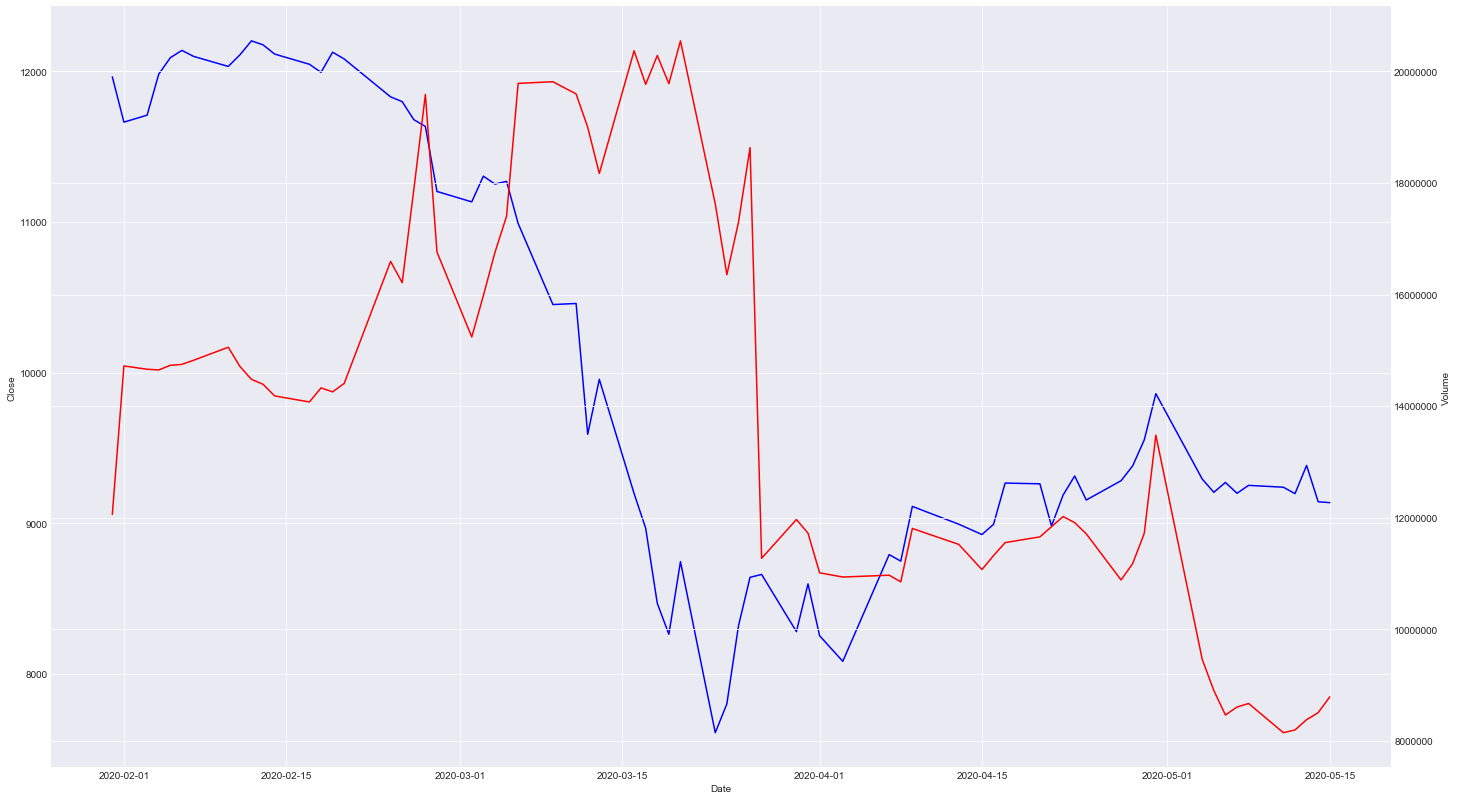

In [21]:
plt.rcParams["figure.figsize"]=24,14
fig, ax1 = plt.subplots()
plt.xlabel('Date')
plt.ylabel('Close')
ax1.plot(POI_analysis['Close'],'b')
ax2 = ax1.twinx()
plt.ylabel('Volume')
plt.ticklabel_format(axis = 'y' , style='plain')
ax2.plot(POI_analysis['OI'],'r')
plt.show()